In [ ]:
#Import the neccessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
#Since the data is already collected by StackOverflow we need not gather the data.
#Download the data and read in the data
df = pd.read_csv("survey_results_public.csv")

In [ ]:
#Read the data for understanding the column descriptions and usage
schema_df = pd.read_csv("survey_results_schema.csv")

In [ ]:
schema_df.shape

(61, 2)

In [ ]:
df.shape

(64461, 61)

In [ ]:
schema_df.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [ ]:
columns,questions = schema_df.iloc[:,0].tolist(),schema_df.iloc[:,1].tolist()
for column,question in zip(columns,questions):
  print(column,"->",question)


Respondent -> Randomized respondent ID number (not in order of survey response time)
MainBranch -> Which of the following options best describes you today? Here, by "developer" we mean "someone who writes code."
Hobbyist -> Do you code as a hobby?
Age -> What is your age (in years)? If you prefer not to answer, you may leave this question blank.
Age1stCode -> At what age did you write your first line of code or program? (e.g., webpage, Hello World, Scratch project)
CompFreq -> Is that compensation weekly, monthly, or yearly?
CompTotal -> What is your current total compensation (salary, bonuses, and perks, before taxes and deductions), in `CurrencySymbol`? Please enter a whole number in the box below, without any punctuation. If you are paid hourly, please estimate an equivalent weekly, monthly, or yearly salary. If you prefer not to answer, please leave the box empty.
ConvertedComp -> Salary converted to annual USD salaries using the exchange rate on 2020-02-19, assuming 12 working mon

In [ ]:
#Print the first five rows
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

**I will try to answer my first question of interest which is about  the most widely used operating system used by developers from the survey**

In [ ]:
op_sys = df["OpSys"].value_counts()

In [ ]:
op_sys

Windows        27170
Linux-based    14932
MacOS          14075
BSD               51
Name: OpSys, dtype: int64

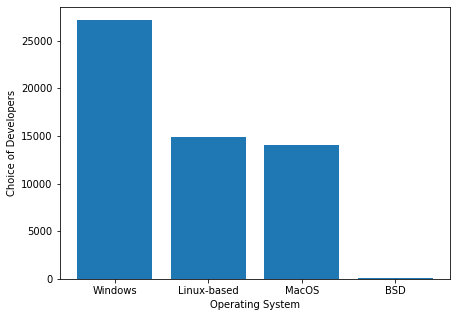

In [ ]:
#Plotting the bar graph
fig = plt.figure(figsize=(7,5))
plt.bar(op_sys.keys(),op_sys.values)
plt.xlabel('Operating System')
plt.ylabel("Choice of Developers")
plt.show()

**From the results we can conclude that Windows was used by the most of the developers followed by MacOs ,Linux-based and BSD**

**Now lets try to find about the language which developers wanted to learn the most**

In [ ]:
#We need to drop the columns where there is no response or N/A
langs = df["LanguageDesireNextYear"].dropna()

In [ ]:
langs.shape

(54113,)

In [ ]:
#A dictionary for counting the occurences of a language
lang_dict = {}
def split_languages(text):
    '''Function Takes in a string 
    splits it by using semicolon as a delimiter.
    It then increments the frequency of the language in the dictionary.
    '''
    languages = text.split(";")#Split the text
    for language in languages:
      lang_dict[str(language)] = lang_dict.get(language,0) + 1

In [ ]:
#Apply the above defined function
langs.apply(split_languages)

0        None
1        None
2        None
4        None
5        None
         ... 
64453    None
64455    None
64457    None
64459    None
64460    None
Name: LanguageDesireNextYear, Length: 54113, dtype: object

In [ ]:
lang_dict

{'Assembly': 2469,
 'Bash/Shell/PowerShell': 11728,
 'C': 6091,
 'C#': 13674,
 'C++': 9756,
 'Dart': 4742,
 'Go': 12605,
 'HTML/CSS': 20771,
 'Haskell': 2996,
 'Java': 13264,
 'JavaScript': 26188,
 'Julia': 1661,
 'Kotlin': 9575,
 'Objective-C': 1525,
 'PHP': 7106,
 'Perl': 1150,
 'Python': 26682,
 'R': 4271,
 'Ruby': 4184,
 'Rust': 10563,
 'SQL': 19970,
 'Scala': 3465,
 'Swift': 5643,
 'TypeScript': 17150,
 'VBA': 1055}

In [ ]:
#Sort the dictionary according to the highest ocuurance of a lanugage
lang_dict = dict(sorted(lang_dict.items(),key = lambda k:k[1],reverse=True))

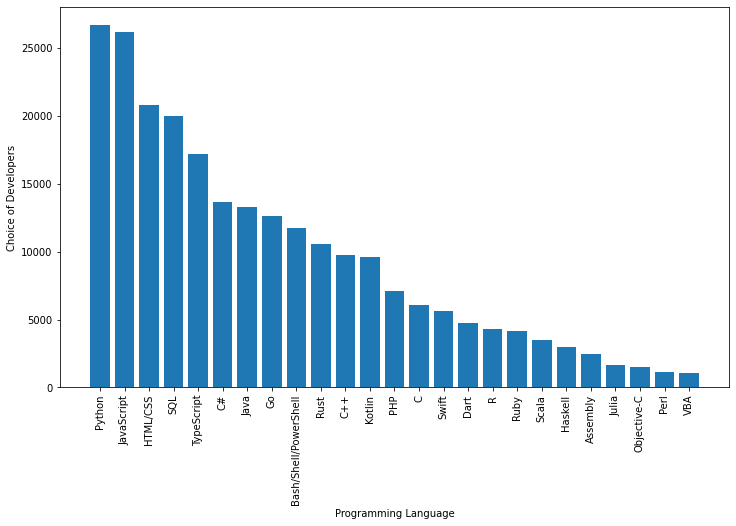

<Figure size 432x288 with 0 Axes>

In [ ]:
#PLotting the bar graph
fig = plt.figure(figsize=(12,7))
plt.bar(lang_dict.keys(),lang_dict.values())
plt.xticks(rotation=90)
plt.xlabel('Programming Language')
plt.ylabel("Choice of Developers")
plt.show()
plt.savefig("languages_trends.png")

**From the graph we can conclude that Javascript and Python are the most sought languages to learn by the developers**

**Now lets try to find out which framework caught most attention from the developer community and thus are willing to learn it next year.**

In [ ]:
#Drop the rows where there is no response given 
web_frameworks = df["WebframeDesireNextYear"].dropna()

In [ ]:
web_frameworks.value_counts()

React.js                                                                                                                   2480
ASP.NET Core                                                                                                               1106
Vue.js                                                                                                                     1079
Spring                                                                                                                     1011
Express;React.js                                                                                                            899
                                                                                                                           ... 
Django;Express;React.js;Spring;Symfony                                                                                        1
Angular;Angular.js;ASP.NET;ASP.NET Core;Django;Drupal;Flask;jQuery;Laravel;React.js;Ruby on Rails;Spring

In [ ]:
#A dicitonary for holding the occurences of a framework
web_framework_dict = {}
def split_frame_work(text):
    '''Function takes in text and splits it
    by using semicolon as a delimiter and increments 
    the occurence of the framework in the dictionary.
    '''
    frame_works = text.split(";")#Split the text
    for frame_work in frame_works:
       web_framework_dict[frame_work] = web_framework_dict.get(frame_work,0) + 1

In [ ]:
#Apply the above defined function
web_frameworks.apply(split_frame_work)

0        None
4        None
5        None
7        None
8        None
         ... 
64438    None
64444    None
64446    None
64459    None
64460    None
Name: WebframeDesireNextYear, Length: 40024, dtype: object

In [ ]:
web_framework_dict

{'ASP.NET': 4818,
 'ASP.NET Core': 9018,
 'Angular': 10762,
 'Angular.js': 5601,
 'Django': 8237,
 'Drupal': 889,
 'Express': 8128,
 'Flask': 6097,
 'Gatsby': 2998,
 'Laravel': 4260,
 'React.js': 20071,
 'Ruby on Rails': 3849,
 'Spring': 6241,
 'Symfony': 1692,
 'Vue.js': 13142,
 'jQuery': 8382}

In [ ]:
#sort the dictionary according to the occurences of the framework in the dictionary.
web_framework_dict = dict(sorted(web_framework_dict.items(),key = lambda k:k[1],reverse=True))

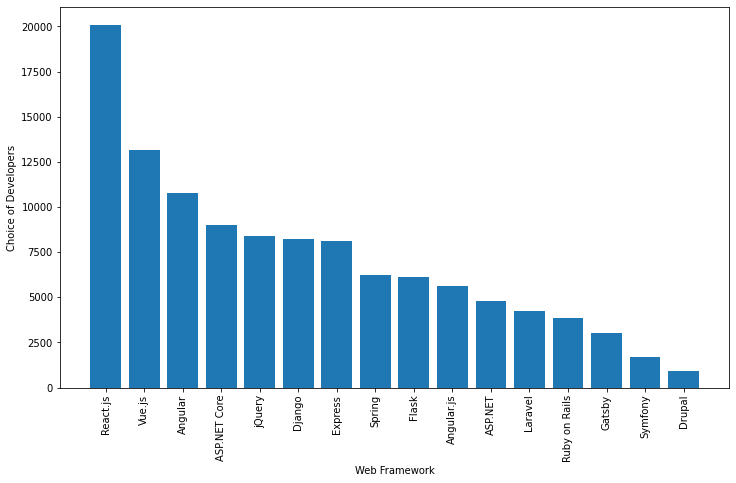

<Figure size 432x288 with 0 Axes>

In [ ]:
#Plot the bar graph
fig = plt.figure(figsize=(12,7))
plt.bar(web_framework_dict.keys(),web_framework_dict.values())
plt.xticks(rotation=90)
plt.xlabel("Web Framework")
plt.ylabel("Choice of Developers")
plt.show()
plt.savefig("web_frameworks_trends.png")

**From the above bar graph we can conclude that React.js,Vue.js and Angular are the most popular frameworks.Interestingly all the three frameworks are based on Javascript.**